# Set up dependencies

In [20]:
"""
# requirements.txt
# Python 3.8.8
numpy==1.19.5
matplotlib==3.4.1
ipywidgets==7.6.4
jupyter>=1.0.0
"""

'\n# requirements.txt\n# Python 3.8.8\nnumpy==1.19.5\nmatplotlib==3.4.1\nipywidgets==7.6.4\n'

In [ ]:
!pip install

## Import modules

In [2]:
# %matplotlib inline
# Math
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
from ipywidgets import (
    interact,
    FloatSlider
)

# Animation
from matplotlib.animation import FuncAnimation

# Genarate Data

In [3]:
X = np.random.choice(np.arange(0, 2*np.pi, 0.1), 60)

M = 5
C = 1

mu = 0
sigma = 1.5
noise = np.random.normal(mu, sigma, X.shape[0])

true_function = M*X + C
Y = true_function + noise

# Manaul learning

<IPython.core.display.Javascript object>


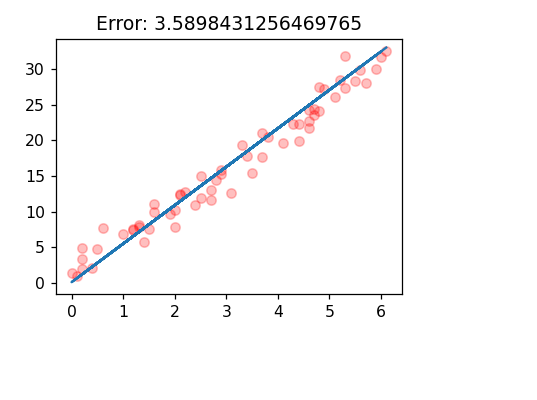

interactive(children=(FloatSlider(value=0.0, description='m', max=10.0, step=0.05), FloatSlider(value=0.0, des…

<function __main__.update_fig(m: float = 2, c: float = 0) -> None>

In [23]:
%matplotlib notebook
plt.ion()
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)


line, = ax.plot(X, X)
ax.scatter(X, Y, color='r', alpha=0.25)


def loss_function(
    y: np.array,
    prediction: np.array
) -> np.array:
    """
    Calculate loss funciton
    """
    return np.mean((y - prediction)**2)


def linear_function(
    m: float,
    c: float,
    X: np.array
) -> np.array:
    """
    Calculate linear results
    """
    return m*X + c


def update_fig(
    m: float=2,
    c: float=0
) -> None:
    """
    Update figure to animate
    """
    prediction = linear_function(m, c, X)
    mse = loss_function(Y, prediction)
    ax.set_title(f"Error: {mse}")
    line.set_ydata(m*X + c)
    try:
        fig.canvas.draw_idle()
    except AttributeError:
        pass


interact(
    update_fig,
    m=FloatSlider(min=0, max=10.0, step=0.05, value=0),
    c=FloatSlider(min=-5, max=10.0, step=0.05, value=0)
)

# Stochastic Gradient Descent
## Partial drift
$$
\frac{\partial}{\partial m}\text{Error function}(m; c, X, Y) =  \frac{\partial}{\partial m}\frac{1}{N}\Sigma_{i=0}^{N-1}(y_i - (mx_i + c))^2 = -\frac{2}{N}\Sigma_{i=0}^{N-1}(y_i - (mx_i + c))(x_i)
$$


$$
\frac{\partial}{\partial c}\text{Error function}(c; m, X, Y) = \frac{\partial}{\partial c}\frac{1}{N}\Sigma_{i=0}^{N-1}(y_i - (mx_i + c))^2 = -\frac{2}{N}\Sigma_{i=0}^{N-1}(y_i - (mx_i + c))
$$

------

In [5]:
def dloss_dm(
    m: float,
    c: float,
    X:np.array,
    Y:np.array
) -> float:
    """
    Calculate gradient of m
    """
    return -2 * np.mean((Y - (m *X + c)) * X)

def dloss_dc(
    m: float,
    c: float,
    X:np.array,
    Y:np.array
) -> float:
    """
    Calculate gradient of c
    """
    return -2 * np.mean((Y - (m *X + c)))


print(f'dloss_dm: {dloss_dm(2, 1, X, Y)}')
print(f'dloss_dc: {dloss_dc(2, 1, X, Y)}')

dloss_dm: -74.02877217781112
dloss_dc: -18.176381720866193


## Limit
$$
\frac{\partial}{\partial m}\text{Error function}(m; c, X, Y) = \lim_{\Delta m \to +0} \frac{\text{Error function}(m + \Delta m) - \text{Error function}(m)}{\Delta m}
$$

$$
\frac{\partial}{\partial c}\text{Error function}(m; c, X, Y) = \lim_{\Delta c \to +0} \frac{\text{Error function}(c + \Delta c) - \text{Error function}(c)}{\Delta c}
$$

In [6]:
delta = 1e-10

def error_function(
    m:float,
    c:float,
    X:np.array,
    Y:np.array,
    loss_fuction=loss_function
) -> float:
    """
    Calculate error 
    """
    prediction = linear_function(m, c, X)
    return loss_function(Y, prediction)


def dloss_dm(
    m: float,
    c: float,
    X: np.array,
    Y: np.array
) -> float:
    """
    Calculate gradient of m 
    """
    return (
        (error_function(m + delta, c, X, Y) - error_function(m, c, X, Y))/
        delta
    )

def dloss_dc(
    m: float,
    c: float,
    X: np.array,
    Y: np.array
) -> float:
    return (
        (error_function(m, c + delta, X, Y) - error_function(m, c, X, Y))/
        delta
    )

print(f'dloss_dm: {dloss_dm(2, 1, X, Y)}')
print(f'dloss_dc: {dloss_dc(2, 1, X, Y)}')

dloss_dm: -74.0288896849961
dloss_dc: -18.17625161493197


# Update functions

$$
m \leftarrow m - \alpha \frac{\partial}{\partial m}\text{Error function}(m; c, X, Y) \\
c \leftarrow c - \alpha \frac{\partial}{\partial c}\text{Error function}(c; m, X, Y)
$$
where $\alpha$ is learning rate

In [7]:
def update_m(
    m: float,
    c: float,
    X: np.array,
    Y: np.array,
    alpha: float
):
    """
    Update new weight of m
    """
    return m - alpha * dloss_dm(m, c, X, Y)


def update_c(
    m: float,
    c: float,
    X: np.array,
    Y: np.array,
    alpha: float
):
    """
    Update new weight of c
    """
    return c - alpha * dloss_dc(m, c, X, Y)

# Train process
## Intiatiate

In [8]:
m = -5
c = -10

alpha = 0.05
iteration = 200

## Start training

In [9]:
plt.ioff()


fig, (ax) = plt.subplots()
ax.axis([min(X) - 1, max(X) + 1, min(Y) - 1, max(Y) + 1])
ax.scatter(X, Y, color='r', alpha=0.25)
l, = ax.plot([],[])



def train(epoch):
    """
    Start training
    """
    global m, c
    prediction = linear_function(m, c, X)
    loss = loss_function(Y, prediction)
    
    
    # Animate
    ax.set_title(f"Epoch: {epoch} Loss: {loss:2.6}")
    l.set_data(X, prediction)
    
    # Update weights
    new_m = update_m(m, c, X, Y, alpha)
    new_c = update_c(m, c, X, Y, alpha)
    m = new_m
    c = new_c
    
    

ani = FuncAnimation(fig, train, frames=iteration)

from IPython.display import HTML
HTML(ani.to_jshtml())

KeyboardInterrupt: 

In [ ]:
class LinearRegressor:
    def __init__(self, alpha: float):
        # Initial weights
        self.m = np.random.normal()
        self.c = np.random.normal()
        
        # Assign learning rate
        self.alpha = alpha
    
    @staticmethod
    def loss_function(y: np.array, prediction: np.array) -> float:
        """
        Calculate loss
        """
        return np.mean((y - prediction)**2)

    def error_function(
        m: float,
        c: float,
        X: np.array,
        Y: np.array
    ):
        prediction = linear_function(m, c, X)
        return self.loss_function(Y, prediction)

    @staticmethod
    def dloss_dm(m:float, c:float, X:np.array, Y:np.array):
        delta = 1e-10
        error_plus_delta = error_function(m + delta, c, X, Y)
        error = error_function(m, c, X, Y)
        return (
            (error_plus_delta - error)/
            delta
        )

    @staticmethod
    def dloss_dc(m:float, c:float, X:np.array, Y:np.array):
        delta = 1e-10
        return (
            (error_function(m, c + delta, X, Y) - error_function(m, c, X, Y))/
            delta
        )
    
    def update_m(
        self,
        X: np.array,
        Y: np.array
    ):
        return self.m - self.alpha * dloss_dm(self.m, self.c, X, Y)

    def update_c(
        self,
        X: np.array,
        Y: np.array,
    ):
        return self.c - self.alpha * dloss_dc(self.m, self.c, X, Y)
    
    def predict(self, X):
        return self.m*X + self.c
    
    def fit(self, X, Y, epoch=20):
        for e in range((epoch)):
            print(f"Epoch: {e}")
            prediction = self.predict(X)
            loss = self.loss_function(prediction, Y)
            print(f"Loss: {loss}")
            
            print("Update weight")
            new_m = self.update_m(X, Y)
            new_c = self.update_c(X, Y)
            
            self.m = new_m
            self.c = new_c
            
            print(f"m = {self.m};\nc = {self.c}")
            print('-' * 36)
        
        
reg = LinearRegressor(0.05)
reg.fit(X, Y)

In [ ]:
reg.predict(np.array([4, 2, 1, 3]))